# Pandas

In [1]:
import pandas as pd
import numpy as np

# Series class
- Numpy에서 제공하는 1차원 배열과 모양이 비슷
- 각 데이터의 의미를 표시하는 index를 붙일 수 있음
- 데이터 자체는 값(value) -> iterable, 배열, scalar value, dict

[image.png](attachment:ea928c17-4d6c-446f-8a79-e0121d2e8e7a.png)
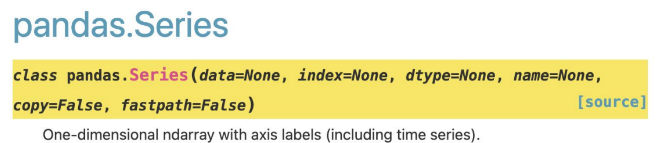

In [2]:
series = pd.Series(['하나', '둘', '셋', '넷', '다섯',
                   '여섯', '일곱', '여덟', '아홉', '열'],
                  index = [_ for _ in range(1,11)])
series

1     하나
2      둘
3      셋
4      넷
5     다섯
6     여섯
7     일곱
8     여덟
9     아홉
10     열
dtype: object

## Series 생성하기

In [3]:
s = pd.Series([9_904_312, 3_448_737, 2_890_451, 2_466_052],
              index = ['서울', '부산', '인천', '대구'])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [4]:
# 연습 문제
s2 = pd.Series(range(10,100,10), index = range(9))

In [5]:
s2

0    10
1    20
2    30
3    40
4    50
5    60
6    70
7    80
8    90
dtype: int64

In [6]:
# index를 지정하지 않고 만들면 0부터 시작하는 정수 값이 됨.
pd.Series(range(10,14))

0    10
1    11
2    12
3    13
dtype: int64

In [7]:
# index는 'index'3 속성으로 접근 가능
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [8]:
# value는 1차원 배열이며 'values' 속성으로 접근 가능
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [9]:
pd.Series()

C:\Users\user\AppData\Local\Temp\ipykernel_17420\2031691219.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [10]:
# 연습 문제
len(s2[s2.values>50])

4

In [11]:
# 풀이
sum(s2.values>50)

4

In [12]:
# name 속성을 이용하여 Series데이터 이름 삽입 가능
# index.name 속성 이용하여 index에 이름 삽입 가능
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [13]:
# dict
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

** dict 일 때 index가 최초에 dict의 key로 만들어져 있고, Series는 index키워드로 전달받은 인수로 index를 재할당함. 그래서, 밑에 예제와 같이 Series 객체의 값이 NaN의 결과를 출력하는 것을 확인 가능.

* Nan 값이 float 자료형에서만 표현 가능하므로 결과가 float 자료형이 되었다는 점에 주의

In [14]:
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['x','y','z'])
ser

x   NaN
y   NaN
z   NaN
dtype: float64

In [15]:
# 연습 문제
social = pd.Series([88,95,100,67], index=['철수','영희','길동','몽룡'])
social

철수     88
영희     95
길동    100
몽룡     67
dtype: int64

## Series index를 속성처럼 활용
    -> label값이 공백없는 문자열인 경우 index label이 속성인 것처럼 마침표(.)를 활용하여 해당 index값에 접근 가능

In [16]:
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

In [17]:
ser.a, ser.b, ser.c

(1, 2, 3)

In [18]:
e = pd.Series({'가나다': 1})
e

가나다    1
dtype: int64

In [19]:
e.가나다

1

## 특징
    -> index label을 키(key)로 사용하기에 딕셔너리 자료형과 비슷한 특징

In [20]:
"서울" in s # 인덱스 레이블 중에 서울이 있는가?

True

In [21]:
"대전" in s # 인덱스 레이블 중에 대전이 있는가?

False

In [22]:
for k, v in s.items():
    print(f'{k}, {v}')

서울, 9904312
부산, 3448737
인천, 2890451
대구, 2466052


In [23]:
test = dict(zip(range(10), list("영일이삼사오육칠팔구")))
test

{0: '영',
 1: '일',
 2: '이',
 3: '삼',
 4: '사',
 5: '오',
 6: '육',
 7: '칠',
 8: '팔',
 9: '구'}

In [24]:
# dict
for k, v in test.items():
    print(f'{k}, {v}')

0, 영
1, 일
2, 이
3, 삼
4, 사
5, 오
6, 육
7, 칠
8, 팔
9, 구


In [25]:
# 연습문제
for k, v in s.items():
    if v > 3_000_000:
        print(f'{k}의 인구는 300만이 넘습니다.')

서울의 인구는 300만이 넘습니다.
부산의 인구는 300만이 넘습니다.


In [26]:
[f'{k}의 인구는 300만이 넘습니다.' for k, v in s.items() if v > 3_000_000]

['서울의 인구는 300만이 넘습니다.', '부산의 인구는 300만이 넘습니다.']

## Series 연산
    * Series의 value에만 적용/ index값은 변하지 x

In [27]:
s / 1_000_000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

## Series 인덱싱

    -> 자료의 순서를 바꾸거나 특정한 자료만 취사 선택 가능

In [28]:
s[1], s['부산']

(3448737, 3448737)

In [29]:
s[3], s['대구']

(2466052, 2466052)

In [30]:
s[[0,3,1]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [31]:
s[['서울', '대구', '부산']]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [32]:
# 단 하나의 값을 시리즈 형태로 가져오고 싶다 -> 값이 하나인 리스트로 인덱싱 작성
s[[0]]

도시
서울    9904312
Name: 인구, dtype: int64

In [33]:
# 연습 문제
s[['인천']]

도시
인천    2890451
Name: 인구, dtype: int64

## Series 슬라이싱
    * 단, 문자열 label을 이용한 슬라이싱을 이용한 경우에는 숫자 인덱싱과 달리 콜론(:) 기호 뒤에 오는 것도 결과에 포함

In [34]:
s[1:3] # 두번째(1)부터 세번째(2)까지 (네번째(3) 미포함)

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [35]:
s['부산':'대구'] # 부산에서 대구까지 (대구도 포함)

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

## Series index 기반 연산

In [36]:
s2 = pd.Series({'서울':9_631_482, '부산': 3_393_191, '인천': 2_632_035, '대전': 1_490_158})
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [37]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [38]:
np.nan - 20

nan

### Series에서 값이 NaN인지 확인
    -> isnull() method

In [39]:
ds.isnull()

대구     True
대전     True
부산    False
서울    False
인천    False
dtype: bool

### Series에서 값이 NaN이 아닌지 확인
    -> notnull() method

In [40]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

### Series에서 NaN이 아닌 값만 인덱싱으로 구하기

In [41]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [42]:
s[s>3_000_000]

도시
서울    9904312
부산    3448737
Name: 인구, dtype: int64

### Series에서 NaN이 아닌 값 구하기

In [43]:
s # 2015년 도시별 인구

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [44]:
s2 # 2010년 도시별 인구

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [45]:
rs = (s - s2) / s2 * 100
rs = rs[rs.notnull()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

In [46]:
# 연습문제
s3 = (s - s2)
s3

s3_result = s3.max()
s3_result

s3[s3 == s3_result]

서울    272830.0
dtype: float64

In [47]:
# 풀이 => nan 값을 제외한 인덱싱 찾아 결과 산출
ds = s - s2 
ds = ds[ds.notnull()]
ds[[ds.values.argmax()]]

서울    272830.0
dtype: float64

## Series 데이터 추가, 갱신, 삭제

In [48]:
rs["부산"] = 1.63

In [49]:
rs

부산    1.630000
서울    2.832690
인천    9.818107
dtype: float64

In [50]:
# 연습 문제
# 인덱싱
rs['서울'] = 2.83
rs['인천'] = 9.82

In [51]:
# 슬라이싱
rs[1:2] = 2.84
rs[2:3] = 9.81

In [52]:
# 풀이 
rs['서울':'인천'] = (2.83, 9.82)

In [53]:
rs

부산    1.63
서울    2.83
인천    9.82
dtype: float64

In [54]:
del rs['서울']
rs

부산    1.63
인천    9.82
dtype: float64

In [55]:
# 연습문제 
fin1 = {'카카오':60010, '삼성전자':61000, 'LG전자':90000}
fin2_value = [60200, 61200,200100]
fin2_index = ['카카오','삼성전자','네이버']

In [56]:
ser_finance1 = pd.Series(fin1)
ser_finance2 = pd.Series(fin2_value, index=fin2_index)

In [57]:
ser_finance1

카카오     60010
삼성전자    61000
LG전자    90000
dtype: int64

In [58]:
ser_finance2

카카오      60200
삼성전자     61200
네이버     200100
dtype: int64

In [59]:
# 연습문제
ser_finance1 - ser_finance2

LG전자      NaN
네이버       NaN
삼성전자   -200.0
카카오    -190.0
dtype: float64

In [60]:
ser_finance1 + ser_finance2

LG전자         NaN
네이버          NaN
삼성전자    122200.0
카카오     120210.0
dtype: float64

In [61]:
ser_finance1 * ser_finance2

LG전자             NaN
네이버              NaN
삼성전자    3.733200e+09
카카오     3.612602e+09
dtype: float64

In [62]:
ser_finance1 / ser_finance2

LG전자         NaN
네이버          NaN
삼성전자    0.996732
카카오     0.996844
dtype: float64

-> 연산 후의 결과값에 NaN 값이 포함되어있어서

In [63]:
type(np.nan)

float

In [64]:
# 연습 문제

result = ser_finance1 - ser_finance2
result

LG전자      NaN
네이버       NaN
삼성전자   -200.0
카카오    -190.0
dtype: float64

In [65]:
result = ser_finance1 - ser_finance2
result[pd.notnull(result)]

삼성전자   -200.0
카카오    -190.0
dtype: float64

## DataFrame class
    -> label된 row와 column, 두 개의 축을 갖는 데이터 구조
    -> 산술 연산은 row와 column 모두 적용
    -> Series 객체를 갖는 dictionary
    
[image.png](attachment:4b8abf96-f654-46ea-89d4-bbd179f0c4ac.png)
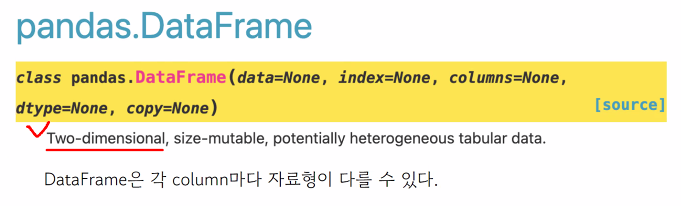

### DataFrame 생성

In [66]:
# 딕셔너리 형태
d = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [67]:
data = {
    "2015" : [9904312, 3448737, 2890451, 2466052],
    "2010" : [9631482, 3393191, 2632035, 2431774],
    "2005" : [9762546, 3512547, 2517680, 2456016],
    "2000" : [9853972, 3655437, 2466338, 2473990],
    "지역" : ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율" :[0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index = index, columns = columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [68]:
df.dtypes

지역                object
2015               int64
2010               int64
2005               int64
2000               int64
2010-2015 증가율    float64
dtype: object

### Dataframe의 속성 values, columns, index

In [69]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [70]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [71]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

### Dataframe 이름 붙이기

In [72]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [73]:
# 
kbo_pitcher = pd.read_csv('kbo_pitcher.csv', encoding='utf-8')
kbo_pitcher

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
0,1,안우진,키움,2.11,30,15,8,0,0,0.652,196,131,4,55,4,224,51,46,0.95
1,2,김광현,SSG,2.13,28,13,3,0,0,0.813,173 1/3,141,10,45,5,153,48,41,1.07
2,3,플럿코,LG,2.39,28,15,5,0,0,0.750,162,125,13,38,2,149,53,43,1.01
3,4,수아레즈,삼성,2.49,30,6,8,0,0,0.429,173 2/3,151,7,50,4,159,61,48,1.16
4,5,켈리,LG,2.54,27,16,4,0,0,0.800,166 1/3,144,10,35,2,153,50,47,1.08
5,6,요키시,키움,2.57,30,10,8,0,0,0.556,185 1/3,169,8,33,5,154,61,53,1.09
6,7,폰트,SSG,2.69,28,13,6,0,0,0.684,184,141,18,34,6,170,63,55,0.95
7,8,루친스키,NC,2.97,31,10,12,0,0,0.455,193 2/3,184,14,34,8,194,77,64,1.13
8,9,뷰캐넌,삼성,3.04,26,11,8,0,0,0.579,160,176,10,39,8,117,61,54,1.34
9,10,소형준,KT,3.05,27,13,6,0,0,0.684,171 1/3,158,8,39,5,117,68,58,1.15


In [74]:
kbo_pitcher.dtypes

순위        int64
선수명      object
팀명       object
ERA     float64
G         int64
W         int64
L         int64
SV        int64
HLD       int64
WPCT    float64
IP       object
H         int64
HR        int64
BB        int64
HBP       int64
SO        int64
R         int64
ER        int64
WHIP    float64
dtype: object

In [75]:
# 
data = {
    '순위': range(1,23),
    '선수명': ['안우진','김광현','플럿코','수아레즈','켈리','요키시','폰트','루친스키','뷰캐넌','소형준','고영표','스탁','최원준','반즈','곽빈','양현종','이의리','박세웅','원태인','김민우','오원석','데스파이네'],
    '팀명': ['키움','SSG','LG','삼성','LG','키움','SSG','NC','삼성','KT','KT','두산','두산','롯데','두산','KIA','KIA','롯데','삼성','한화','SSG','KT'],
    '평균자책점': [2.11,2.13,2.39,2.49,2.54,2.57,2.69,2.97,3.04,3.05,3.2,3.6,3.6,3.62,3.78,3.85,3.86,3.89,3.92,4.36,4.5,4.53]
}
index = range(1,23)
columns = ['순위','선수명','팀명','평균자책점']

kbo_pitcher_2 = pd.DataFrame(data, columns = columns, index=index)
                             
    
kbo_pitcher_2

,순위,선수명,팀명,평균자책점
1,1,안우진,키움,2.11
2,2,김광현,SSG,2.13
3,3,플럿코,LG,2.39
4,4,수아레즈,삼성,2.49
5,5,켈리,LG,2.54
6,6,요키시,키움,2.57
7,7,폰트,SSG,2.69
8,8,루친스키,NC,2.97
9,9,뷰캐넌,삼성,3.04
10,10,소형준,KT,3.05


## DataFrame 전치(Tranpose) 

In [76]:
kbo_pitcher_2.T

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
순위,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
선수명,안우진,김광현,플럿코,수아레즈,켈리,요키시,폰트,루친스키,뷰캐넌,소형준,...,최원준,반즈,곽빈,양현종,이의리,박세웅,원태인,김민우,오원석,데스파이네
팀명,키움,SSG,LG,삼성,LG,키움,SSG,NC,삼성,KT,...,두산,롯데,두산,KIA,KIA,롯데,삼성,한화,SSG,KT
평균자책점,2.11,2.13,2.39,2.49,2.54,2.57,2.69,2.97,3.04,3.05,...,3.6,3.62,3.78,3.85,3.86,3.89,3.92,4.36,4.5,4.53


In [77]:
df['2010-2015 증가율'] = df['2010-2015 증가율'] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


## DataFrame column 추가,갱신,삭제

In [78]:
# 추가
df['2005-2010 증가율'] = ((df['2010'] - df['2005'])/ df['2005'] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [79]:
# 삭제
del df['2010-2015 증가율']
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


## DataFrame column 인덱싱
    -> column label을 키로, column Series를 값으로 가지는 딕셔너리와 비슷
 

In [80]:
# 하나의 column만 인덱싱하면 Series가 반환된다.
df['지역']

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [81]:
# 2010이라는 column을 반환하면서 Series 자료형으로 반환
df['2010']

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [82]:
type(df['2010'])

pandas.core.series.Series

In [83]:
# 여러 개의 column을 인덱싱하면 부분적인 DataFrame이 반환된다.
df[['2010','2015']]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [84]:
# 2010이라는 column을 반환하면서 DataFrame 자료형을 유지
df[['2010']]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [85]:
type(df[['2010']])

pandas.core.frame.DataFrame

In [86]:
# 정수 index를 column 인덱싱에 사용할 수 없다.
df[1]

KeyError: 1

* 별도의 columns 키워드 인수를 전달하지 않으면 RangeIndex를 기본값으로 부여합니다.

In [87]:
df2 = pd.DataFrame(np.arange(12).reshape(3,4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [88]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int32

In [89]:
df2[[1,2]]

,1,2
0,1,2
1,5,6
2,9,10


## DataFrame row 슬라이싱
    -> row 단위 인덱싱을 하고자 하면 항상 슬라이싱
    -> index 값이 문자 label이면 label 슬라이싱도 가능

In [90]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [91]:
df[:1] # df['서울'] --> 문자는 포함, 숫자는 미포함

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [92]:
df[1:2]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


In [93]:
df['부산':'부산']

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


## DataFrame row 인덱싱할 경우
    -> row 단위로 인덱싱을 하면 KeyError 발생

In [191]:
df['서울']

KeyError: '서울'

## DataFrame 개별 데이터 인덱싱

In [95]:
df['2015']['서울']

9904312

In [96]:
type(df['2015']['서울'])

numpy.int64

### -> * 역순은 가능?

In [97]:
df['서울':'서울']

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [98]:
df['서울':'서울']['2015']

도시
서울    9904312
Name: 2015, dtype: int64

In [99]:
type(df['서울':'서울']['2015'])

pandas.core.series.Series

In [100]:
# 연습문제
data = {
    '국어': [80,90,70,30],
    '영어': [90,70,60,40],
    '수학': [90,60,80,70],
}

columns = ['국어', '영어', '수학']
index = ['춘향', '몽룡', '향단', '방자']
df = pd.DataFrame(data, index=index, columns=columns)
df

,국어,영어,수학
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,40,70


In [101]:
# 1) 모든 학생의 수학 점수를 Series로 나타낸다.
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [102]:
# 2) 모든 학생의 국어와 영어 점수를 데이터프레임으로 나타낸다.
df[['국어','영어']]

,국어,영어
춘향,80,90
몽룡,90,70
향단,70,60
방자,30,40


In [103]:
# 3) 모든 학생의 각 과목 평균 점수를 새로운 열을 추가한다.
df['평균'] = (df['수학'] + df['국어'] + df['영어'])/ 3
df

,국어,영어,수학,평균
춘향,80,90,90,86.666667
몽룡,90,70,60,73.333333
향단,70,60,80,70.000000
방자,30,40,70,46.666667


In [104]:
# 4) 춘향의 점수를 DataFrame으로 나타낸다.
df[df.index == '춘향']

# 풀이
df[:1] # or df['춘향':'춘향']

,국어,영어,수학,평균
춘향,80,90,90,86.666667


In [105]:
# 5) 향단의 점수를 Series로 나타낸다.
df.T['향단']

국어    70.0
영어    60.0
수학    80.0
평균    70.0
Name: 향단, dtype: float64

In [106]:
# 연습 문제
np.random.seed(0)
result = pd.DataFrame(np.random.randn(6,4), 
                      index=pd.date_range('20130226', periods=6),
                      columns=['A','B','C','D'])
result

,A,B,C,D
2013-02-26,1.764052,0.400157,0.978738,2.240893
2013-02-27,1.867558,-0.977278,0.950088,-0.151357
2013-02-28,-0.103219,0.410599,0.144044,1.454274
2013-03-01,0.761038,0.121675,0.443863,0.333674
2013-03-02,1.494079,-0.205158,0.313068,-0.854096
2013-03-03,-2.552990,0.653619,0.864436,-0.742165


## Series의 값이 많은 경우 

In [107]:
nums = pd.Series(range(500))
nums

0        0
1        1
2        2
3        3
4        4
      ... 
495    495
496    496
497    497
498    498
499    499
Length: 500, dtype: int64

## Series head() 메서드
    -> head()
        => default: 5

In [108]:
nums.head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

## Series tail() 메서드
    -> tail()
        => default: 5

In [109]:
nums.tail(10)

490    490
491    491
492    492
493    493
494    494
495    495
496    496
497    497
498    498
499    499
dtype: int64

## Series 수학 연산

In [110]:
nums = pd.Series([1, 2, np.nan, 4, 5])
nums

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64

## Series 수학 연산 - nunique() 메서드
    -> 고유한 값의 개수를 계산할 때 사용

In [111]:
hello = pd.Series(list("hello"))
hello

0    h
1    e
2    l
3    l
4    o
dtype: object

In [112]:
hello.nunique()

4

## Series 수학 연산 - count() 메서드
    -> nan인 값에 대해서는 개수에 포함하지 x

In [113]:
nums.count()

4

In [114]:
len(nums)

5

## Series 수학 연산 - sum() 메서드
    -> skip.na 파라미터의 기본 값이 true여서 결측치를 포함하지 않고 계산

In [115]:
nums.sum()

12.0

In [116]:
nums.sum(skipna=False)

nan

## Series 수학 연산 - mean(), median(), std() 메서드

In [117]:
nums.mean()

3.0

In [118]:
nums.median()

3.0

In [119]:
nums.std()

1.8257418583505538

## Series 수학 연산 - max(), min() 메서드

In [120]:
nums.max()

5.0

In [121]:
nums.min()

1.0

### * 문자열 - ord() 함수: 하나의 문자를 Unicode 숫자로 변경

In [122]:
somechar = pd.Series(list("AaBbCc"))
somechar

0    A
1    a
2    B
3    b
4    C
5    c
dtype: object

In [123]:
somechar.max()

'c'

In [124]:
somechar.min()

'A'

In [125]:
ord('A')

65

In [126]:
ord('c')

99

In [127]:
ord('ㄱ')

12593

## Series 수학 연산 - describe() 메서드

In [128]:
# 수치형 - count, mean, std, min, 25%, median, 75%, max
nums.describe()

count    4.000000
mean     3.000000
std      1.825742
min      1.000000
25%      1.750000
50%      3.000000
75%      4.250000
max      5.000000
dtype: float64

In [129]:
# 문자열 - count, unique, top, freq
hello.describe()

count     5
unique    4
top       l
freq      2
dtype: object

## Series의 변환
    -> 파이썬의 기본 자료구조(list, dict 등) 변경 가능

In [130]:
nums

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64

In [131]:
list(nums)

[1.0, 2.0, nan, 4.0, 5.0]

In [132]:
dict(nums)

{0: 1.0, 1: 2.0, 2: nan, 3: 4.0, 4: 5.0}

In [133]:
# 연습문제
superheros = [
    "Batman",
    "Superman",
    "Spider-Man",
    "Iron Man",
    "Captain America",
    "Wonder Woman"
]

strength_levels = (100, 120, 90, 95, 110, 120)

In [134]:
heros = pd.Series(strength_levels, superheros)
heros

Batman             100
Superman           120
Spider-Man          90
Iron Man            95
Captain America    110
Wonder Woman       120
dtype: int64

In [135]:
heros.tail(4)

Spider-Man          90
Iron Man            95
Captain America    110
Wonder Woman       120
dtype: int64

In [136]:
heros.nunique()

5

In [137]:
# 평균
heros.mean()

# 중앙값
heros.median()

# 최대값
heros.max()

# 최소값
heros.min()

90

In [138]:
dict(heros)

{'Batman': 100,
 'Superman': 120,
 'Spider-Man': 90,
 'Iron Man': 95,
 'Captain America': 110,
 'Wonder Woman': 120}

## Pandas 데이터 입출력

### csv 파일을 Series로 데이터로 읽어오기

In [139]:
# squeeze 매개변수는 하나의 열을 갖는 DataFrame을 Series로 변환
pokemons = pd.read_csv('datas/pokemon.csv', index_col='Pokemon').squeeze()

In [140]:
pokemons

Pokemon
Bulbasaur      Grass / Poison
Ivysaur        Grass / Poison
Venusaur       Grass / Poison
Charmander               Fire
Charmeleon               Fire
                    ...      
Stakataka        Rock / Steel
Blacephalon      Fire / Ghost
Zeraora              Electric
Meltan                  Steel
Melmetal                Steel
Name: Type, Length: 809, dtype: object

In [141]:
# 데이터의 총 개수
pokemons.count()

809

In [142]:
# 고유한 값의 종류
pokemons.unique()

array(['Grass / Poison', 'Fire', 'Fire / Flying', 'Water', 'Bug',
       'Bug / Flying', 'Bug / Poison', 'Normal / Flying', 'Normal',
       'Poison', 'Electric', 'Ground', 'Poison / Ground', 'Fairy',
       'Normal / Fairy', 'Poison / Flying', 'Bug / Grass', 'Fighting',
       'Water / Fighting', 'Psychic', 'Water / Poison', 'Rock / Ground',
       'Water / Psychic', 'Electric / Steel', 'Water / Ice',
       'Ghost / Poison', 'Grass / Psychic', 'Ground / Rock', 'Grass',
       'Psychic / Fairy', 'Ice / Psychic', 'Water / Flying',
       'Rock / Water', 'Rock / Flying', 'Ice / Flying',
       'Electric / Flying', 'Dragon', 'Dragon / Flying',
       'Water / Electric', 'Fairy / Flying', 'Psychic / Flying',
       'Water / Fairy', 'Rock', 'Grass / Flying', 'Water / Ground',
       'Dark', 'Dark / Flying', 'Ghost', 'Normal / Psychic',
       'Bug / Steel', 'Ground / Flying', 'Steel / Ground', 'Bug / Rock',
       'Bug / Fighting', 'Dark / Ice', 'Fire / Rock', 'Ice / Ground',
       'Water

In [143]:
# 제일 많이 갖고 있는 값 - Normal
# 제일 많이 갖는 값의 개수 - 65
pokemons.describe()

count        809
unique       159
top       Normal
freq          65
Name: Type, dtype: object

### Series의 값 정렬하기 sort_values() 메서드

In [144]:
pokemons.sort_values()

Pokemon
Illumise                Bug
Silcoon                 Bug
Pinsir                  Bug
Burmy                   Bug
Wurmple                 Bug
                  ...      
Tirtouga       Water / Rock
Relicanth      Water / Rock
Corsola        Water / Rock
Carracosta     Water / Rock
Empoleon      Water / Steel
Name: Type, Length: 809, dtype: object

In [145]:
pokemons.sort_values(ascending=False) # 반대로

Pokemon
Empoleon      Water / Steel
Corsola        Water / Rock
Relicanth      Water / Rock
Carracosta     Water / Rock
Tirtouga       Water / Rock
                  ...      
Kricketune              Bug
Cascoon                 Bug
Scatterbug              Bug
Kricketot               Bug
Grubbin                 Bug
Name: Type, Length: 809, dtype: object

### csv 파일을 Series로 데이터 읽어오기

In [146]:
# parse_dates는 csv파일에서 데이터를 읽어들일 때
# 날짜 /시간으로 파싱해야하는 컬럼을 지정할 수 있습니다.
google = pd.read_csv('datas/google_stocks.csv',
                     parse_dates=["Date"],
                     index_col="Date").squeeze()
google

Date
2004-08-19      49.98
2004-08-20      53.95
2004-08-23      54.50
2004-08-24      52.24
2004-08-25      52.80
               ...   
2019-10-21    1246.15
2019-10-22    1242.80
2019-10-23    1259.13
2019-10-24    1260.99
2019-10-25    1265.13
Name: Close, Length: 3824, dtype: float64

In [147]:
# usecols 인수를 활용하면
# csv 파일로부터 pandas가 가져와야 하는 열의 목록을 지정할 수 있음.
war = pd.read_csv('datas/revolutionary_war.csv',
                  parse_dates=["Start Date"],
                  index_col="Start Date",
                  usecols=["Start Date", "State"]).squeeze()
war

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 232, dtype: object

In [148]:
war.describe()

count                162
unique                17
top       South Carolina
freq                  31
Name: State, dtype: object

In [149]:
# 연습문제 
# nan값을 갖는 데이터는 총 몇개인가? - 70
len(war) - war.count()

# 풀이
war.isnull().sum()

70

In [150]:
# 결측치를 제외한 값의 갯수는 몇인가? - 162
war.count()

162

In [151]:
# 유일한 값의 개수는 총 몇개인가? - 17
war.nunique()

17

## Series의 값 정렬하기 sort_values() 메서드 

In [152]:
war.sort_values(na_position='first')

Start Date
1775-09-17         NaN
1775-12-31         NaN
1776-03-03         NaN
1776-03-25         NaN
1776-05-18         NaN
                ...   
1781-07-06    Virginia
1781-07-01    Virginia
1781-06-26    Virginia
1781-04-25    Virginia
1783-01-22    Virginia
Name: State, Length: 232, dtype: object

In [153]:
war.sort_values(na_position='last')

Start Date
1781-09-06    Connecticut
1779-07-05    Connecticut
1777-04-27    Connecticut
1777-09-03       Delaware
1777-05-17        Florida
                 ...     
1782-08-08            NaN
1782-08-25            NaN
1782-09-13            NaN
1782-10-18            NaN
1782-12-06            NaN
Name: State, Length: 232, dtype: object

## Series의 값 중 nan 배제하기 dropna()

In [154]:
war.dropna()

Start Date
1774-09-01     Massachusetts
1774-12-14     New Hampshire
1775-04-19     Massachusetts
1775-04-19     Massachusetts
1775-04-20          Virginia
                   ...      
1782-08-15          Virginia
1782-08-19          Virginia
1782-08-26    South Carolina
1782-09-11          Virginia
1783-01-22          Virginia
Name: State, Length: 162, dtype: object

## Series의 index를 기준으로 정렬하기

In [155]:
pokemons.sort_index(ascending=True)

Pokemon
Abomasnow        Grass / Ice
Abra                 Psychic
Absol                   Dark
Accelgor                 Bug
Aegislash      Steel / Ghost
                  ...       
Zoroark                 Dark
Zorua                   Dark
Zubat        Poison / Flying
Zweilous       Dark / Dragon
Zygarde      Dragon / Ground
Name: Type, Length: 809, dtype: object

In [156]:
pokemons.sort_index(ascending=False)

Pokemon
Zygarde      Dragon / Ground
Zweilous       Dark / Dragon
Zubat        Poison / Flying
Zorua                   Dark
Zoroark                 Dark
                  ...       
Aegislash      Steel / Ghost
Accelgor                 Bug
Absol                   Dark
Abra                 Psychic
Abomasnow        Grass / Ice
Name: Type, Length: 809, dtype: object

In [157]:
# NaT - Not a Time의 줄임말, 날짜/시간 유형의 데이터
war.sort_index()

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1783-01-22         Virginia
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
Name: State, Length: 232, dtype: object

In [158]:
war.sort_index(na_position='first')

Start Date
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
1774-09-01    Massachusetts
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 232, dtype: object

In [159]:
war.sort_index(na_position='last')

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1783-01-22         Virginia
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
Name: State, Length: 232, dtype: object

## Series의 index에 NaT 배제하기(참고)

In [160]:
war.loc[war.index.dropna()] # dropna()를 쓰려면 index의 중복이 없어야 한다.

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-19    Massachusetts
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 250, dtype: object

In [161]:
war.index.dropna()

DatetimeIndex(['1774-09-01', '1774-12-14', '1775-04-19', '1775-04-19',
               '1775-04-20', '1775-05-10', '1775-05-27', '1775-06-11',
               '1775-06-17', '1775-08-08',
               ...
               '1782-08-08', '1782-08-15', '1782-08-19', '1782-08-26',
               '1782-08-25', '1782-09-11', '1782-09-13', '1782-10-18',
               '1782-12-06', '1783-01-22'],
              dtype='datetime64[ns]', name='Start Date', length=228, freq=None)

In [162]:
war.loc[war.index.notnull()] # 1:1 매핑하여 수를 확인함

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 228, dtype: object

In [163]:
# 연습 문제
google.sort_values(ascending=False).head(10)

Date
2019-04-29    1287.58
2019-04-26    1272.18
2018-07-26    1268.33
2019-10-25    1265.13
2019-04-23    1264.55
2018-07-25    1263.70
2019-04-25    1263.45
2019-10-24    1260.99
2019-10-23    1259.13
2019-04-24    1256.00
Name: Close, dtype: float64

In [164]:
google.sort_values().head(10)

Date
2004-09-03    49.82
2004-09-01    49.94
2004-08-19    49.98
2004-09-02    50.57
2004-09-07    50.60
2004-08-30    50.81
2004-09-08    50.96
2004-09-09    50.96
2004-08-31    50.99
2004-08-24    52.24
Name: Close, dtype: float64

## Series nsmallest(), nlargest() 메서드

In [165]:
google.nlargest(10)

Date
2019-04-29    1287.58
2019-04-26    1272.18
2018-07-26    1268.33
2019-10-25    1265.13
2019-04-23    1264.55
2018-07-25    1263.70
2019-04-25    1263.45
2019-10-24    1260.99
2019-10-23    1259.13
2019-04-24    1256.00
Name: Close, dtype: float64

In [166]:
google.nsmallest(10)

Date
2004-09-03    49.82
2004-09-01    49.94
2004-08-19    49.98
2004-09-02    50.57
2004-09-07    50.60
2004-08-30    50.81
2004-09-08    50.96
2004-09-09    50.96
2004-08-31    50.99
2004-08-24    52.24
Name: Close, dtype: float64

## Series value_counts() 메서드

In [167]:
pokemons.value_counts()

Normal                65
Water                 61
Grass                 38
Psychic               35
Fire                  30
                      ..
Fire / Psychic         1
Normal / Ground        1
Psychic / Fighting     1
Dark / Ghost           1
Fire / Ghost           1
Name: Type, Length: 159, dtype: int64

In [168]:
bins = np.linspace(0, 1400, 8)
bins

array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.])

In [169]:
# 소괄호((,))는 해당 값의 미포함을 나타내며, 대괄호([,])는 해당 값을 포함한다는 의미
google.value_counts(bins=bins)

(200.0, 400.0]      1568
(-0.001, 200.0]      595
(400.0, 600.0]       575
(1000.0, 1200.0]     406
(600.0, 800.0]       380
(800.0, 1000.0]      207
(1200.0, 1400.0]      93
Name: Close, dtype: int64

In [170]:
# 연습 문제

bins = np.linspace(0, 1400, 8)
bins

google.value_counts(bins=bins).sort_index()

(-0.001, 200.0]      595
(200.0, 400.0]      1568
(400.0, 600.0]       575
(600.0, 800.0]       380
(800.0, 1000.0]      207
(1000.0, 1200.0]     406
(1200.0, 1400.0]      93
Name: Close, dtype: int64

In [171]:
# bins(단, 구간의 크기가 일정치 않을 수 있음), sort 옵션
google.value_counts(bins=8, sort=False)

(48.581, 204.54]       651
(204.54, 359.26]      1435
(359.26, 513.98]       263
(513.98, 668.7]        466
(668.7, 823.42]        334
(823.42, 978.14]       161
(978.14, 1132.86]      283
(1132.86, 1287.58]     231
Name: Close, dtype: int64

### Pandas 데이터 csv로 출력하기
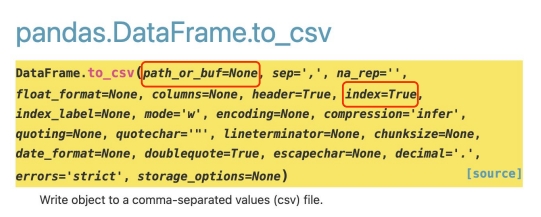

In [172]:
df = pd.DataFrame({
    'c1': [1,2,'누락'],
    'c2': [1.11, '', 3.33],
    'c3': ['one', 'two', 'three']
})
df

,c1,c2,c3
0,1,1.11,one
1,2,,two
2,누락,3.33,three


In [173]:
df.iloc[1,1]

''

In [174]:
df.to_csv('sample1.csv', index=False)

In [175]:
import os
os.getcwd()

'C:\\python'

### Pandas csv로부터 데이터 입력하기
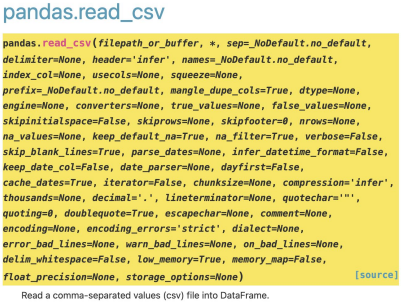

In [176]:
df_read = pd.read_csv('datas/sample1.csv')
df_read

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


### Pandas 데이터 csv로 출력(2)

In [177]:
df.to_csv('datas/sample2.csv', index=False, header=False)

### Pandas csv로부터 데이터 입력하기(2) 
    -> names

In [178]:
pd.read_csv('datas/sample2.csv', names=['c1','c2','c3'])

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


In [179]:
%%writefile datas/sample3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Overwriting datas/sample3.txt


In [180]:
pd.read_table('datas/sample3.txt', sep='\s+')

,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


### Pandas 데이터 csv로 출력하기(3)

In [181]:
%%writefile datas/sample4.txt
파일 제목: sample4.txt
데이터 포맷의 설명:
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting datas/sample4.txt


### Pandas csv로부터 데이터 입력하기(3)
    -> skiprows

In [182]:
pd.read_csv('datas/sample4.txt', skiprows=[0,1])

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


### Pandas csv로부터 데이터 입력하기(4)
    -> na_value

In [183]:
df_na_val = pd.read_csv('sample1.csv', na_values=['누락'])
df_na_val

,c1,c2,c3
0,1.0,1.11,one
1,2.0,NaN,two
2,NaN,3.33,three


### Pandas 데이터 csv로 출력하기(4)

In [184]:
df_na_val.to_csv('datas/sample5.txt', sep='|')

### Pandas 데이터 csv로 출력하기(4)

In [185]:
df_na_val.to_csv('datas/sample6.csv', na_rep='누락')

In [186]:
df_na_val

,c1,c2,c3
0,1.0,1.11,one
1,2.0,NaN,two
2,NaN,3.33,three


### 온라인의 csv 파일 가져오기

In [187]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [188]:
titanic

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [189]:
titanic.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [192]:
# 
kbo_pitcher = pd.read_csv('kbo_pitcher.csv', encoding='utf-8')
kbo_pitcher

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
0,1,안우진,키움,2.11,30,15,8,0,0,0.652,196,131,4,55,4,224,51,46,0.95
1,2,김광현,SSG,2.13,28,13,3,0,0,0.813,173 1/3,141,10,45,5,153,48,41,1.07
2,3,플럿코,LG,2.39,28,15,5,0,0,0.750,162,125,13,38,2,149,53,43,1.01
3,4,수아레즈,삼성,2.49,30,6,8,0,0,0.429,173 2/3,151,7,50,4,159,61,48,1.16
4,5,켈리,LG,2.54,27,16,4,0,0,0.800,166 1/3,144,10,35,2,153,50,47,1.08
5,6,요키시,키움,2.57,30,10,8,0,0,0.556,185 1/3,169,8,33,5,154,61,53,1.09
6,7,폰트,SSG,2.69,28,13,6,0,0,0.684,184,141,18,34,6,170,63,55,0.95
7,8,루친스키,NC,2.97,31,10,12,0,0,0.455,193 2/3,184,14,34,8,194,77,64,1.13
8,9,뷰캐넌,삼성,3.04,26,11,8,0,0,0.579,160,176,10,39,8,117,61,54,1.34
9,10,소형준,KT,3.05,27,13,6,0,0,0.684,171 1/3,158,8,39,5,117,68,58,1.15


In [193]:
kbo_era_top10 = kbo_pitcher[0:10]
kbo_era_top10.to_csv('datas/kbo_era_top10.csv', encoding='cp949')

In [194]:
kbo_era_top10

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
0,1,안우진,키움,2.11,30,15,8,0,0,0.652,196,131,4,55,4,224,51,46,0.95
1,2,김광현,SSG,2.13,28,13,3,0,0,0.813,173 1/3,141,10,45,5,153,48,41,1.07
2,3,플럿코,LG,2.39,28,15,5,0,0,0.750,162,125,13,38,2,149,53,43,1.01
3,4,수아레즈,삼성,2.49,30,6,8,0,0,0.429,173 2/3,151,7,50,4,159,61,48,1.16
4,5,켈리,LG,2.54,27,16,4,0,0,0.800,166 1/3,144,10,35,2,153,50,47,1.08
5,6,요키시,키움,2.57,30,10,8,0,0,0.556,185 1/3,169,8,33,5,154,61,53,1.09
6,7,폰트,SSG,2.69,28,13,6,0,0,0.684,184,141,18,34,6,170,63,55,0.95
7,8,루친스키,NC,2.97,31,10,12,0,0,0.455,193 2/3,184,14,34,8,194,77,64,1.13
8,9,뷰캐넌,삼성,3.04,26,11,8,0,0,0.579,160,176,10,39,8,117,61,54,1.34
9,10,소형준,KT,3.05,27,13,6,0,0,0.684,171 1/3,158,8,39,5,117,68,58,1.15


In [195]:
# 데이터 시각화 패키지
import seaborn as sns

In [196]:
titanic = sns.load_dataset('titanic')

In [197]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## DataFrame head() 메서드

In [198]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


## DataFrame tail() 메서드

In [199]:
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## DataFrame sample() 메서드

In [200]:
titanic.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
568,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
249,0,2,male,54.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,no,False


## DataFrame nunique() 메서드

In [201]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

## DataFrame count() 메서드

In [202]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [203]:
len(titanic) # row의 전체 크기를 알려준다.

891

## DataFrame 타입 조회하기

In [204]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

## DataFrame 수학 연산 sum() 메서드

In [205]:
titanic.sum(numeric_only=True)

survived        342.0000
pclass         2057.0000
age           21205.1700
sibsp           466.0000
parch           340.0000
fare          28693.9493
adult_male      537.0000
alone           537.0000
dtype: float64

## DataFrame 수학 연산 mean(), median(), std() 메서드

In [206]:
titanic.mean(numeric_only=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [207]:
titanic.median(numeric_only=True)

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [208]:
titanic.std(numeric_only=True)

survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

## DataFrame 수학 연산 max(), min() 메서드

In [209]:
titanic.max(numeric_only=True)

survived             1
pclass               3
age               80.0
sibsp                8
parch                6
fare          512.3292
adult_male        True
alone             True
dtype: object

In [210]:
titanic.min(numeric_only=True)

survived          0
pclass            1
age            0.42
sibsp             0
parch             0
fare            0.0
adult_male    False
alone         False
dtype: object

## DataFrame 수학 연산 축의 방향

In [211]:
# row
titanic[['age', 'fare', 'survived']].sum(axis='rows')

age         21205.1700
fare        28693.9493
survived      342.0000
dtype: float64

In [212]:
titanic[['age', 'fare', 'survived']].sum(axis=0)

age         21205.1700
fare        28693.9493
survived      342.0000
dtype: float64

In [213]:
# column
titanic[['age', 'fare', 'survived']].sum(axis='columns')

0       29.2500
1      110.2833
2       34.9250
3       89.1000
4       43.0500
         ...   
886     40.0000
887     50.0000
888     23.4500
889     57.0000
890     39.7500
Length: 891, dtype: float64

In [214]:
titanic[['age', 'fare', 'survived']].sum(axis=1)

0       29.2500
1      110.2833
2       34.9250
3       89.1000
4       43.0500
         ...   
886     40.0000
887     50.0000
888     23.4500
889     57.0000
890     39.7500
Length: 891, dtype: float64

## DataFrame nsmallest(), nlargest() 메서드

In [215]:
titanic.nlargest(3, columns=['fare','age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [216]:
titanic.nsmallest(3, columns=['age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False


## DataFrame describe() 메서드

In [217]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [218]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## NBA 데이터 가져오기

In [222]:
nba = pd.read_csv('datas/nba.csv',
                 parse_dates=["Birthday"])
nba

,Name,Team,Position,Birthday,Salary
0,Shake Milton,Philadelphia 76ers,SG,1996-09-26,1445697
1,Christian Wood,Detroit Pistons,PF,1995-09-27,1645357
2,PJ Washington,Charlotte Hornets,PF,1998-08-23,3831840
3,Derrick Rose,Detroit Pistons,PG,1988-10-04,7317074
4,Marial Shayok,Philadelphia 76ers,G,1995-07-26,79568
...,...,...,...,...,...
445,Austin Rivers,Houston Rockets,PG,1992-08-01,2174310
446,Harry Giles,Sacramento Kings,PF,1998-04-22,2578800
447,Robin Lopez,Milwaukee Bucks,C,1988-04-01,4767000
448,Collin Sexton,Cleveland Cavaliers,PG,1999-01-04,4764960


In [223]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      450 non-null    object        
 1   Team      450 non-null    object        
 2   Position  450 non-null    object        
 3   Birthday  450 non-null    datetime64[ns]
 4   Salary    450 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 17.7+ KB


In [240]:
# 연습 문제
nba.dtypes

Name                object
Team                object
Position            object
Birthday    datetime64[ns]
Salary               int64
dtype: object

In [241]:
nba.dtypes.value_counts()

object            3
datetime64[ns]    1
int64             1
dtype: int64

In [247]:
# 연습 문제
# 차원의 수: 2
nba.ndim

In [247]:
# 모양: (450,5)
nba.shape

In [247]:
# 컬럼 인덱스: Index(['Name', 'Team', 'Position', 'Birthday', 'Salary'], dtype='object')
nba.columns

In [247]:
# 로우 인덱스: RangeIndex(start=0, stop=450, step=1)
nba.index

In [261]:
# 연습 문제
# 결측치 칼럼 - 갯수: 없음
nba.isnull().sum()

In [261]:
# 전체 모든 데이터의 갯수 - 2250
nba.count().sum()

2250

In [265]:
!pip install pandas_profiling

     ------------------------------------- 324.4/324.4 kB 10.1 MB/s eta 0:00:00
     ------------------------------------- 344.5/344.5 kB 10.8 MB/s eta 0:00:00
     ------------------------------------- 663.5/663.5 kB 43.5 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.2/2.2 MB 22.9 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 30.1 MB/s eta 0:00:00
     ------------------------------------- 296.5/296.5 kB 19.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=7dfe44f0085910070bcf0442e922970f4653486c17a68f3d416d2789edef6b2b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [266]:
import pandas_profiling
nba.profile_report()

C:\Users\user\AppData\Local\Temp\ipykernel_17420\1671078508.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [269]:
# 연습 문제
nba.nunique()

Name        450
Team         30
Position      9
Birthday    430
Salary      269
dtype: int64

In [274]:
nba.max()

Name             Zylan Cheatham
Team         Washington Wizards
Position                     SG
Birthday    2000-12-23 00:00:00
Salary                 40231758
dtype: object

In [275]:
nba.min()

Name               Aaron Gordon
Team              Atlanta Hawks
Position                      C
Birthday    1977-01-26 00:00:00
Salary                    79568
dtype: object

In [284]:
# 연습 문제
nba.nlargest(5,['Salary'])

KeyError: "None of [Int64Index([40231758, 38506482, 38506482, 38199000, 38199000, 37436858,\n            37199000, 34449964, 33296296, 33005556,\n            ...\n               79568,    79568,    79568,    79568,    79568,    79568,\n               79568,    79568,    79568,    79568],\n           dtype='int64', length=450)] are in the [columns]"

In [286]:
# 연습 문제
nba.nsmallest(5,['Birthday'])

,Name,Team,Position,Birthday,Salary
98,Vince Carter,Atlanta Hawks,PF,1977-01-26,2564753
196,Udonis Haslem,Miami Heat,C,1980-06-09,2564753
262,Kyle Korver,Milwaukee Bucks,PF,1981-03-17,6004753
149,Tyson Chandler,Houston Rockets,C,1982-10-02,2564753
415,Andre Iguodala,Memphis Grizzlies,SF,1984-01-28,17185185


In [291]:
# 연습문제
# 합계
nba.sum(numeric_only=True)

In [291]:
# 평균
nba.mean(numeric_only=True)

In [291]:
# 중앙값
nba.median(numeric_only=True)

In [291]:
# 표준편차
nba.std(numeric_only=True)

In [292]:
# 요약
nba.describe()

,Salary
count,4.500000e+02
mean,7.653584e+06
std,9.288810e+06
min,7.956800e+04
25%,1.618520e+06
50%,3.303074e+06
75%,1.012957e+07
max,4.023176e+07


## DataFrame의 값 정렬하기 sort_values() 메서드

In [293]:
titanic.sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,yes,True
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
277,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True


In [294]:
titanic.sort_values(by=['fare','age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
302,0,3,male,19.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,yes,True
179,0,3,male,36.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
806,0,1,male,39.0,0,0,0.0000,S,First,man,True,A,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [295]:
titanic.sort_values(by=['fare','age'],ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [297]:
titanic.sort_values(by=['fare','age','sex'],ascending=[False,True,True], na_position='last')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


## DataFrame의 row index를 기준으로 정렬하기

In [298]:
titanic.sort_index(axis=1)

,adult_male,age,alive,alone,class,deck,embark_town,embarked,fare,parch,pclass,sex,sibsp,survived,who
0,True,22.0,no,False,Third,NaN,Southampton,S,7.2500,0,3,male,1,0,man
1,False,38.0,yes,False,First,C,Cherbourg,C,71.2833,0,1,female,1,1,woman
2,False,26.0,yes,True,Third,NaN,Southampton,S,7.9250,0,3,female,0,1,woman
3,False,35.0,yes,False,First,C,Southampton,S,53.1000,0,1,female,1,1,woman
4,True,35.0,no,True,Third,NaN,Southampton,S,8.0500,0,3,male,0,0,man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,27.0,no,True,Second,NaN,Southampton,S,13.0000,0,2,male,0,0,man
887,False,19.0,yes,True,First,B,Southampton,S,30.0000,0,1,female,0,1,woman
888,False,NaN,no,False,Third,NaN,Southampton,S,23.4500,2,3,female,1,0,woman
889,True,26.0,yes,True,First,C,Cherbourg,C,30.0000,0,1,male,0,1,man


In [299]:
titanic.sort_index(axis=1, ascending=False)

,who,survived,sibsp,sex,pclass,parch,fare,embarked,embark_town,deck,class,alone,alive,age,adult_male
0,man,0,1,male,3,0,7.2500,S,Southampton,NaN,Third,False,no,22.0,True
1,woman,1,1,female,1,0,71.2833,C,Cherbourg,C,First,False,yes,38.0,False
2,woman,1,0,female,3,0,7.9250,S,Southampton,NaN,Third,True,yes,26.0,False
3,woman,1,1,female,1,0,53.1000,S,Southampton,C,First,False,yes,35.0,False
4,man,0,0,male,3,0,8.0500,S,Southampton,NaN,Third,True,no,35.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,man,0,0,male,2,0,13.0000,S,Southampton,NaN,Second,True,no,27.0,True
887,woman,1,0,female,1,0,30.0000,S,Southampton,B,First,True,yes,19.0,False
888,woman,0,1,female,3,2,23.4500,S,Southampton,NaN,Third,False,no,NaN,False
889,man,1,0,male,1,0,30.0000,C,Cherbourg,C,First,True,yes,26.0,True


In [312]:
# 성별(sex) 인원수
titanic['sex'].value_counts().sort_values(ascending=False)

In [312]:
# 나이별(age) 인원수
titanic['age'].value_counts().sort_values(ascending=False)

In [312]:
# 선실별(class) 인원수
titanic['class'].value_counts().sort_values(ascending=False)

In [312]:
# 사망/생존(alive) 인원수
titanic['alive'].value_counts().sort_values(ascending=False)

## DataFrame 고급 인덱싱
- loc: label값 기반의 2차원 인덱싱 - df.loc[row 인덱스]
- iloc: 순서를 나타내는 정수 기반의 2차원 인덱싱 - df.loc[row 인덱스, column 인덱스]

    * index 데이터
    * index 데이터 슬라이스
    * index 데이터 리스트
    * 같은 row 인덱스를 가지는 boolean Series(row 인덱싱의 경우)
    * 또는 위의 값들을 반환하는 함수

In [315]:
df = pd.DataFrame({
    'A': range(10,19,4),
    'B': range(11,20,4),
    'C': range(12,21,4),
    'D': range(13,22,4)},
    index = ['a','b','c'])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [317]:
df = pd.DataFrame(np.arange(10,22).reshape(3,4),
                index = ['a','b','c'],
                 columns=['A','B','C','D'])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [318]:
# 인덱싱
df.loc['a']

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [319]:
# 슬라이싱
df.loc['b':'c']

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [320]:
df['b':'c']

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [321]:
# 리스트 형태
df.loc[['b','c']]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [322]:
df[['b','c']]

KeyError: "None of [Index(['b', 'c'], dtype='object')] are in the [columns]"

In [323]:
df.A > 15

a    False
b    False
c     True
Name: A, dtype: bool

In [324]:
df.loc[df.A > 15]

,A,B,C,D
c,18,19,20,21


In [325]:
def select_rows(df, num):
    return df.A > num

In [326]:
select_rows(df, 10)

a    False
b     True
c     True
Name: A, dtype: bool

In [327]:
df.loc[select_rows(df, 10)]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [328]:
# column label 인덱싱이나 column label 리스트 인덱싱 x
df.loc['A'] #Keyerror

KeyError: 'A'

In [329]:
df.loc[['A','B']] # KeyError

KeyError: "None of [Index(['A', 'B'], dtype='object')] are in the [index]"

In [330]:
df2 = pd.DataFrame(np.arange(10, 26).reshape(4, 4), columns=['A','B','C','D'])
df2

,A,B,C,D
0,10,11,12,13
1,14,15,16,17
2,18,19,20,21
3,22,23,24,25


In [331]:
# row인덱스 값이 정수인 경우 - 마지막 값 포함 => 단, loc만
df2.loc[1:2]

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


### loc 인덱서 vs iloc 인덱서

In [332]:
df2.loc[1:2]

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


In [333]:
df2.iloc[1:2]

,A,B,C,D
1,14,15,16,17


In [335]:
df.loc['a','A']

10

In [336]:
df.at['a','A']

10

In [337]:
df.loc['b':, 'A']

b    14
c    18
Name: A, dtype: int32

In [338]:
df.loc['a', :]

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [339]:
df.loc[['a','b'], ['B','D']]

,B,D
a,11,13
b,15,17


In [340]:
df.loc[df.A > 10, ['C', 'D']]

,C,D
b,16,17
c,20,21


### iloc 인덱서

In [341]:
df.iloc[0,1]

11

In [342]:
df.iloc[:2,2]

a    12
b    16
Name: C, dtype: int32

In [343]:
df.iloc[0,-2:]

C    12
D    13
Name: a, dtype: int32

In [344]:
df.iloc[2:3,1:3]

,B,C
c,19,20


In [345]:
df.iloc[-1]

A    18
B    19
C    20
D    21
Name: c, dtype: int32

In [346]:
df.iloc[-1] = df.iloc[-1] * 2
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,36,38,40,42


In [347]:
# 연습문제

titanic = sns.load_dataset('titanic')

In [348]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [356]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [357]:
# 1) 타이타닉호 승객의 평균 나이를 구하세요.
round(titanic['age'].mean(),1)

In [357]:
# 2) 타이타닉호 승객 중 여성 승객의 평균 나이를 구하세요.
round(titanic[titanic['sex'] == 'female']['age'].mean(),1)

In [357]:
# 3) 타이타닉호 승객 중 1등실(pclass==1)선실의 여성 승객의 평균 나이를 구하세요.
round(titanic[(titanic['sex'] == 'female') & (titanic['pclass'] == 1)]['age'].mean(),1)

* 연습 문제<br>
teams.csv 읽어들여서 DataFrame으로 만듭니다.
우리 반 총 28명입니다. 4명씩 짝을 지어 팀을 구성합니다.
1팀~7팀까지 배정을 하는데 팀 배정 방법은 랜덤하게 배정합니다.

'team'이라는 이름의 Column을 하나 추가 합니다. int형으로 해당하는 팀의 숫자값을 저장합니다.

teams_result.csv 파일로 저장합니다.

In [359]:
#teams = pd.read_csv('datas/teams.csv')
#teams.

,성명,성별
0,강예림,여
1,강호정,남
2,고유리,여
3,김정인,여
4,김지성,남
5,김지오,여
6,노재승,남
7,박기영,남
8,박수현,여
9,배선화,여


In [372]:
#np.random.randint(1,28,(4,7))

array([[ 5, 25, 22,  8, 11, 11, 18],
       [27, 25, 19, 17,  1,  5,  3],
       [14,  2,  3,  3, 20, 21, 27],
       [13,  8, 22, 14, 18, 27, 20]])

In [381]:
#for i in range(7):
#    i += 1
#    print(teams.sample(4,random_state=0)['성별'],i)

2     여
22    남
14    남
17    여
Name: 성별, dtype: object 1
2     여
22    남
14    남
17    여
Name: 성별, dtype: object 2
2     여
22    남
14    남
17    여
Name: 성별, dtype: object 3
2     여
22    남
14    남
17    여
Name: 성별, dtype: object 4
2     여
22    남
14    남
17    여
Name: 성별, dtype: object 5
2     여
22    남
14    남
17    여
Name: 성별, dtype: object 6
2     여
22    남
14    남
17    여
Name: 성별, dtype: object 7


In [376]:
# type(teams.sample(4,random_state=0))

pandas.core.frame.DataFrame

In [378]:
# teams

,성명,성별
0,강예림,여
1,강호정,남
2,고유리,여
3,김정인,여
4,김지성,남
5,김지오,여
6,노재승,남
7,박기영,남
8,박수현,여
9,배선화,여
